In [1]:
import timeit
import matplotlib.pyplot as plt
import math

from bad_sorts import (
    create_near_sorted_list,
    insertion_sort2,
    bubble_sort,
    selection_sort
)


In [2]:
length = 2500       
max_value = 2**30
runs = 5

max_swaps = int(length * math.log(length) / 2)
step = max(1, max_swaps // 10)
swaps_list = list(range(0, max_swaps + 1, step))
if swaps_list[-1] != max_swaps:
    swaps_list.append(max_swaps)

In [3]:
ins_times = []
bub_times = []
sel_times = []

for swaps in swaps_list:
    ins_total = 0
    bub_total = 0
    sel_total = 0

    for _ in range(runs):
        L = create_near_sorted_list(length, max_value, swaps)

        start = timeit.default_timer()
        insertion_sort2(L.copy())
        ins_total += timeit.default_timer() - start

        start = timeit.default_timer()
        bubble_sort(L.copy())
        bub_total += timeit.default_timer() - start

        start = timeit.default_timer()
        selection_sort(L.copy())
        sel_total += timeit.default_timer() - start

    ins_times.append(ins_total / runs)
    bub_times.append(bub_total / runs)
    sel_times.append(sel_total / runs)


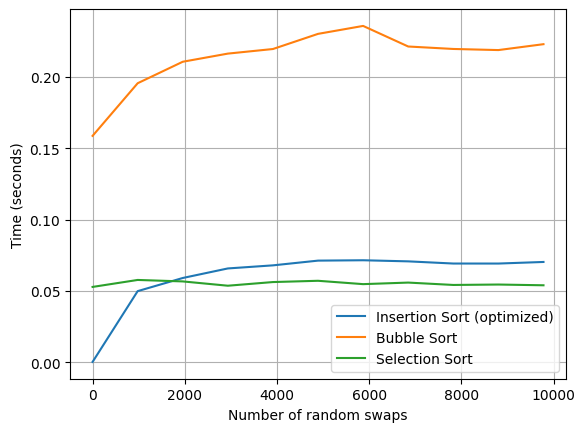

In [4]:
plt.figure()
plt.plot(swaps_list, ins_times, label="Insertion Sort (optimized)")
plt.plot(swaps_list, bub_times, label="Bubble Sort")
plt.plot(swaps_list, sel_times, label="Selection Sort")

plt.xlabel("Number of random swaps")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.savefig("experiment3_graph.png", dpi=300)
plt.show()
